## Image data preprocessing

### 환경구성

In [1]:
import os
import matplotlib.pyplot as plt
import cv2

### Dataset 정리

In [2]:
# 전체 data 불러오기 + train, val, test로 분할
import numpy as np
from sklearn.model_selection import train_test_split

def load_all_data(base_dir, img_size=(224, 224)):
    images = []
    labels = []
    categories = ['NORMAL', 'PNEUMONIA']
    
    for category in categories:
        class_num = categories.index(category) # ls.index(data) : data의 index를 반환
        for subset in ['train', 'test', 'val']:
            subset_dir = os.path.join(base_dir, subset, category) # root/datasets/pneumonia   /train   /normal
            for img in os.listdir(subset_dir):
                try:
                    img_path = os.path.join(subset_dir, img) # image 파일의 경로
                    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # image array로 불러오기
                    new_array = cv2.resize(img_array, img_size) # img_size에 맞춰서 크기 조정
                    images.append(new_array) 
                    labels.append(class_num)
                except Exception as e:
                    print(f"Error loading image {img}: {e}")
    
    return np.array(images), np.array(labels)

def split_data(X, y, test_size=0.2, val_size=0.2):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size / (1 - test_size), stratify=y_train_val, random_state=42)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

#### Data 불러오기

In [3]:
%pwd

'c:\\Users\\seoju\\OneDrive\\문서\\workspace\\ESG 2024 prac'

In [4]:
base_dir = "datasets/Pneumonia"
X, y = load_all_data(base_dir,)

X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)
print(f"Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}")
print(f"Val data shape: {X_val.shape}, Val labels shape: {y_val.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Train data shape: (3513, 224, 224), Train labels shape: (3513,)
Val data shape: (1171, 224, 224), Val labels shape: (1171,)
Test data shape: (1172, 224, 224), Test labels shape: (1172,)


### Preparing tutorial

#### Resize

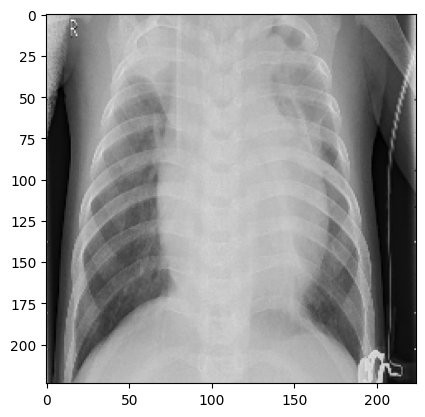

In [5]:
def resize_img(image, size=(224, 224)):
    return cv2.resize(image, size)

resized_img = resize_img(X_train[708])
plt.imshow(resized_img, cmap='gray')
plt.show()

#### Histogram Equalization

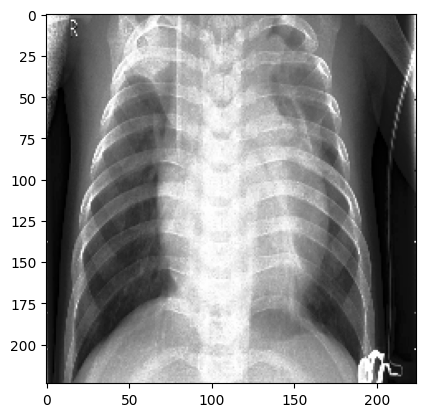

In [6]:
def he_img(image):
    return cv2.equalizeHist(image)

equalized_img = he_img(X_train[708])
plt.imshow(equalized_img, cmap='gray')
plt.show()

#### Noise Reduction

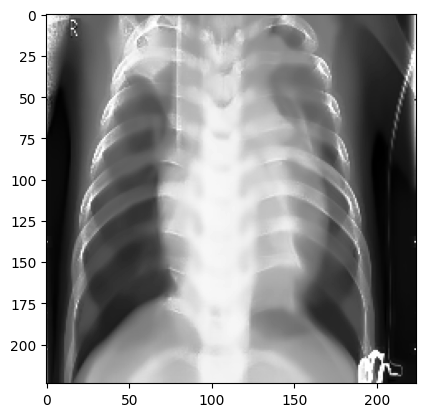

In [10]:
def noise_reduction(image):
    return cv2.fastNlMeansDenoising(image, None, 10, 7, 21)

nr_image = noise_reduction(he_img(X_train[708]))
plt.imshow(nr_image, cmap='gray')
plt.show()

#### Image Normalization

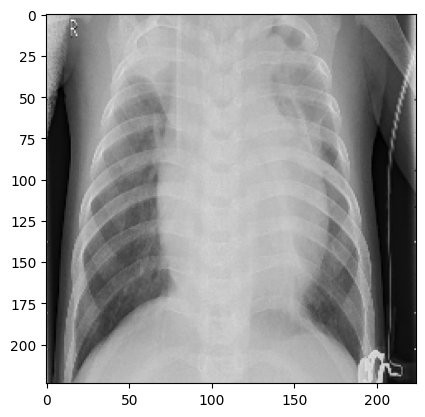

In [12]:
def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

normalized_img = normalize_image(X_train[708])
plt.imshow(normalized_img, cmap='gray')
plt.show()

#### Edge Detection

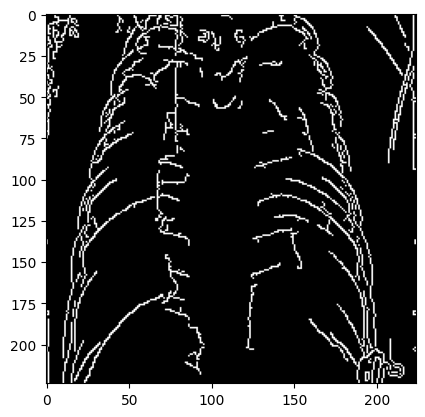

In [18]:
def detect_edge(image):
    return cv2.Canny(image, 128, 255)

edges = detect_edge(he_img(X_train[708]))
plt.imshow(edges, cmap='gray')
plt.show()

#### Blurring

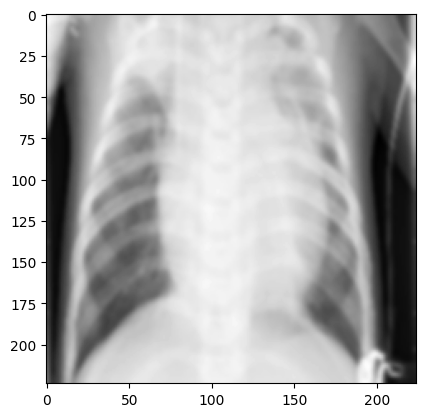

In [24]:
def blur_image(image):
    return cv2.GaussianBlur(image, (7, 7), 0)

blurred_img = blur_image(X_train[708])
plt.imshow(blurred_img, cmap='gray')
plt.show()

#### Contour

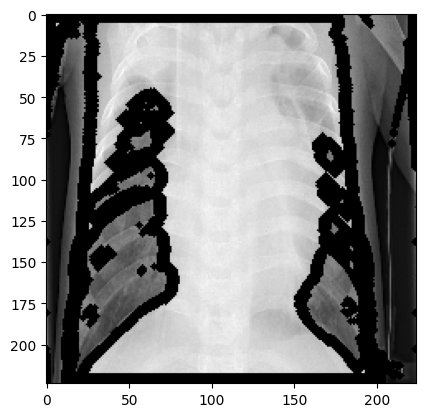

In [27]:
def contour_image(image):
    ret, thresh = cv2.threshold(image, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = contour_image(X_train[708])
contour_img = cv2.drawContours(X_train[708], contours, -1, (0, 255, 0), 3)
plt.imshow(contour_img, cmap='gray')
plt.show()